<a href="https://colab.research.google.com/github/nadinne94/desigualdade_genero/blob/main/div_genero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

In [ ]:
!pip install plot-likert
import plot_likert

In [ ]:
df = pd.read_csv('State_of_data_2022.csv')

In [ ]:
df.shape

(4271, 353)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Columns: 353 entries, ('P0', 'id') to ('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')
dtypes: bool(1), float64(284), object(68)
memory usage: 11.5+ MB


In [ ]:
df.columns

Index(['('P0', 'id')', '('P1_a ', 'Idade')', '('P1_a_1 ', 'Faixa idade')',
       '('P1_b ', 'Genero')', '('P1_c ', 'Cor/raca/etnia')',
       '('P1_d ', 'PCD')', '('P1_e ', 'experiencia_profissional_prejudicada')',
       '('P1_f ', 'aspectos_prejudicados')', '('P1_g ', 'vive_no_brasil')',
       '('P1_i ', 'Estado onde mora')',
       ...
       '('P8_d_2 ', 'Coletando e limpando os dados que uso para análise e modelagem.')',
       '('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')',
       '('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')',
       '('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')',
       '('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')',

In [ ]:
df = df.iloc[:, 0:52]

In [ ]:
# Renomear as colunas
new_columns = {}

for col in df.columns:
    # Remove o prefixo 'P' e os números, e deixa apenas o nome descritivo
    new_name = col[4:].split(",")[1].strip(" ')")
    new_columns[col] = new_name

# Aplica a renomeação das colunas
df = df.rename(columns=new_columns)

In [ ]:
df

,id,Idade,Faixa idade,Genero,Cor/raca/etnia,PCD,experiencia_profissional_prejudicada,aspectos_prejudicados,vive_no_brasil,Estado onde mora,...,Ambiente e clima de trabalho,Oportunidade de aprendizado e trabalhar com referências na área,Plano de carreira e oportunidades de crescimento profissional,Maturidade da empresa em termos de tecnologia e dados,Qualidade dos gestores e líderes,Reputação que a empresa tem no mercado,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,0.0,0.0,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,0.0,0.0,1.0,0.0,0.0,1.0,Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,0.0,0.0,0.0,0.0,0.0,0.0,Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,0.0,1.0,0.0,0.0,0.0,0.0,Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,0.0,1.0,1.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,0.0,0.0,0.0,0.0,0.0,0.0,Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...
4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Minas Gerais (MG),...,1.0,0.0,1.0,0.0,0.0,0.0,Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...
4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,1.0,0.0,0.0,0.0,0.0,0.0,Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,"Sim, ocorreram layoffs/demissões em massa na e..."
4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,0.0,1.0,0.0,0.0,0.0,1.0,Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...


In [ ]:
df['Genero'].value_counts()

Masculino               3194
Feminino                1056
Prefiro não informar      12
Name: Genero, dtype: int64

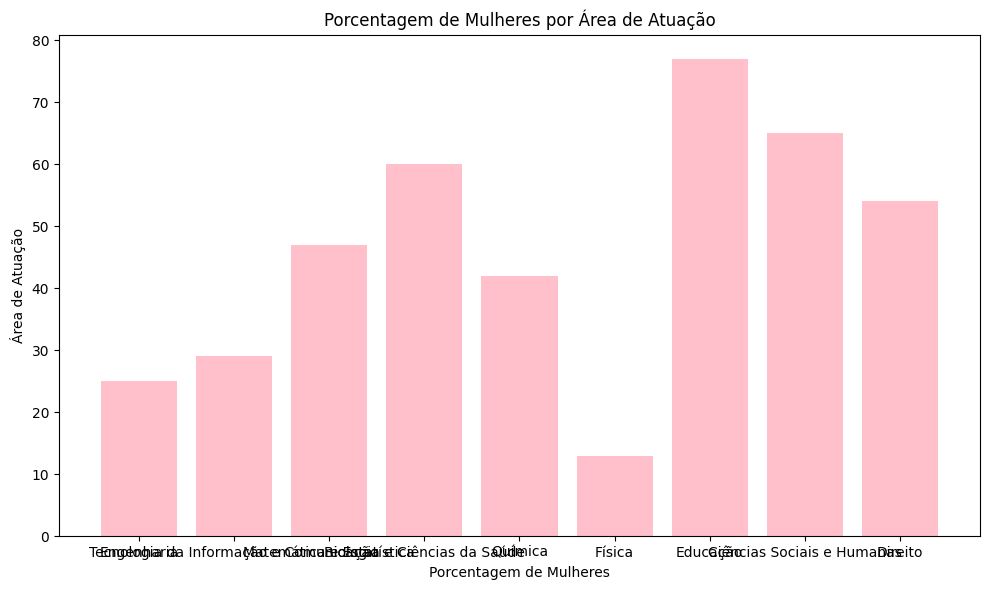

In [ ]:
# Dados por área de atuação
dados_por_area = {
    'Engenharia': 25,
    'Tecnologia da Informação e Comunicação': 29,
    'Matemática e Estatística': 47,
    'Biologia e Ciências da Saúde': 60,
    'Química': 42,
    'Física': 13,
    'Educação': 77,
    'Ciências Sociais e Humanas': 65,
    'Direito': 54
}

# Preparar os dados para o gráfico
areas = list(dados_por_area.keys())
porcentagens = list(dados_por_area.values())

# Plotar o gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.bar(areas, porcentagens, color='pink')

# Adicionar rótulos e título
plt.xlabel('Porcentagem de Mulheres')
plt.ylabel('Área de Atuação')
plt.title('Porcentagem de Mulheres por Área de Atuação')

# Mostrar o gráfico
#plt.gca().invert_yaxis()  # Inverter a ordem das barras para iniciar da maior porcentagem
plt.tight_layout()
plt.show()

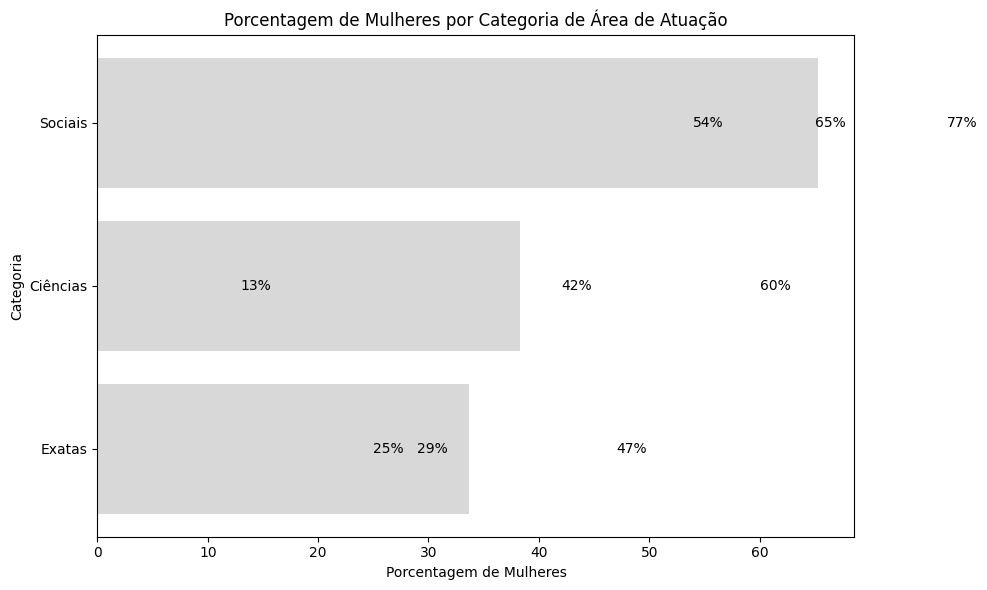

In [ ]:
# Dados por área de atuação
dados_por_area = {
    'Engenharia': 25,
    'Tecnologia da Informação e Comunicação': 29,
    'Matemática e Estatística': 47,
    'Biologia e Ciências da Saúde': 60,
    'Química': 42,
    'Física': 13,
    'Educação': 77,
    'Ciências Sociais e Humanas': 65,
    'Direito': 54
}

# Agrupar as áreas por categoria
categorias = {
    'Exatas': ['Engenharia', 'Tecnologia da Informação e Comunicação', 'Matemática e Estatística'],
    'Ciências': ['Biologia e Ciências da Saúde', 'Química', 'Física'],
    'Sociais': ['Educação', 'Ciências Sociais e Humanas', 'Direito']
}

# Calcular as porcentagens por categoria
porcentagens_por_categoria = {categoria: sum([dados_por_area[area] for area in areas]) / len(areas)
                               for categoria, areas in categorias.items()}

# Plotar o gráfico de barras para as categorias
plt.figure(figsize=(10, 6))
plt.barh(list(porcentagens_por_categoria.keys()), list(porcentagens_por_categoria.values()), color='gray', alpha=0.3, label='Categoria')

# Adicionar rótulos e título
plt.xlabel('Porcentagem de Mulheres')
plt.ylabel('Categoria')
plt.title('Porcentagem de Mulheres por Categoria de Área de Atuação')

# Plotar barras individuais para cada área dentro de cada categoria
for categoria, areas in categorias.items():
    for idx, area in enumerate(areas):
        plt.text(dados_por_area[area], categoria, f"{dados_por_area[area]}%", va='center')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

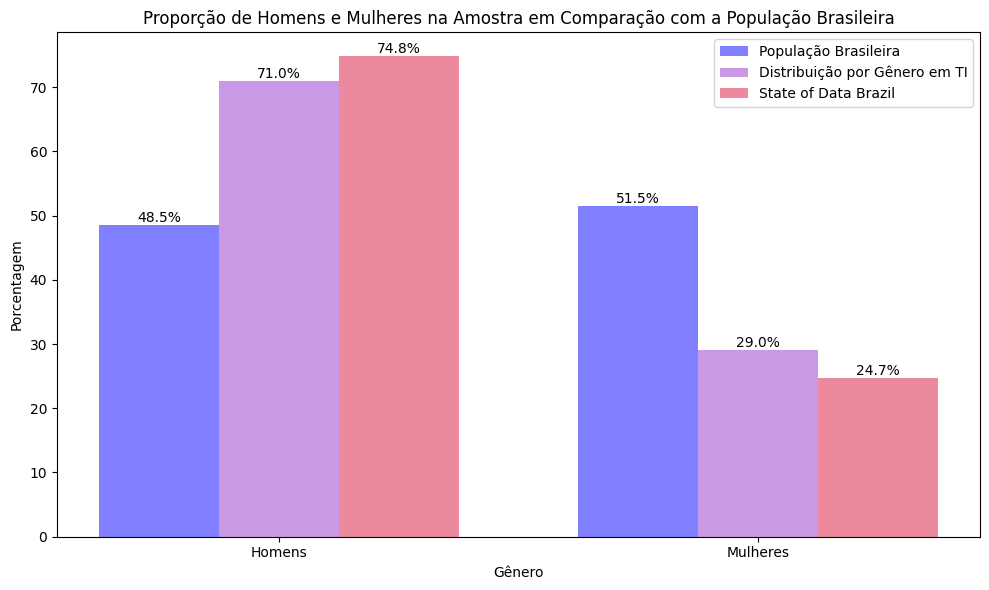

In [ ]:
# Proporção real da população brasileira
prop_populacao = {'Homens': 48.5, 'Mulheres': 51.5}

# Proporção na amostra (substitua pelos seus dados reais)
percentual_genero = df['Genero'].value_counts() / len(df['Genero']) * 100
prop_amostra = percentual_genero.drop('Prefiro não informar').to_dict()

# Proporção na área de Tecnologia da Informação
prop_tecnologia = {'Homens': 71, 'Mulheres': 29}

# Coordenadas das barras
bar_width = 0.25
bar_positions1 = np.arange(len(prop_populacao))
bar_positions2 = [x + bar_width for x in bar_positions1]
bar_positions3 = [x + bar_width for x in bar_positions2]

# Plotar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(bar_positions1, prop_populacao.values(), width=bar_width, color='blue', alpha=0.5, label='População Brasileira')
plt.bar(bar_positions2, prop_tecnologia.values(), width=bar_width, color='darkorchid', alpha=0.5, label='Distribuição por Gênero em TI')
plt.bar(bar_positions3, prop_amostra.values(), width=bar_width, color='crimson', alpha=0.5, label='State of Data Brazil')

# Adicionar rótulos de porcentagem nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (p.get_x() + width / 2, p.get_height()), ha='center', va='bottom', fontsize=10)

plt.title('Proporção de Homens e Mulheres na Amostra em Comparação com a População Brasileira')
plt.xlabel('Gênero')
plt.ylabel('Porcentagem')
plt.xticks([x + bar_width for x in range(len(prop_populacao))], prop_populacao.keys())
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df_copy = df[(df['Cor/raca/etnia'] != 'Prefiro não informar') & (df['Cor/raca/etnia'] !='Outra')].copy()
df_copy

,id,Idade,Faixa idade,Genero,Cor/raca/etnia,PCD,experiencia_profissional_prejudicada,aspectos_prejudicados,vive_no_brasil,Estado onde mora,...,Ambiente e clima de trabalho,Oportunidade de aprendizado e trabalhar com referências na área,Plano de carreira e oportunidades de crescimento profissional,Maturidade da empresa em termos de tecnologia e dados,Qualidade dos gestores e líderes,Reputação que a empresa tem no mercado,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,0.0,0.0,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,0.0,0.0,1.0,0.0,0.0,1.0,Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,0.0,0.0,0.0,0.0,0.0,0.0,Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,0.0,1.0,0.0,0.0,0.0,0.0,Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,0.0,1.0,1.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,0.0,0.0,0.0,0.0,0.0,0.0,Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...
4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Minas Gerais (MG),...,1.0,0.0,1.0,0.0,0.0,0.0,Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...
4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,1.0,0.0,0.0,0.0,0.0,0.0,Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,"Sim, ocorreram layoffs/demissões em massa na e..."
4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,0.0,1.0,0.0,0.0,0.0,1.0,Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...


In [ ]:
df_copy['Cor/raca/etnia'].value_counts()

Branca      2744
Parda       1054
Preta        291
Amarela      128
Indígena      11
Name: Cor/raca/etnia, dtype: int64

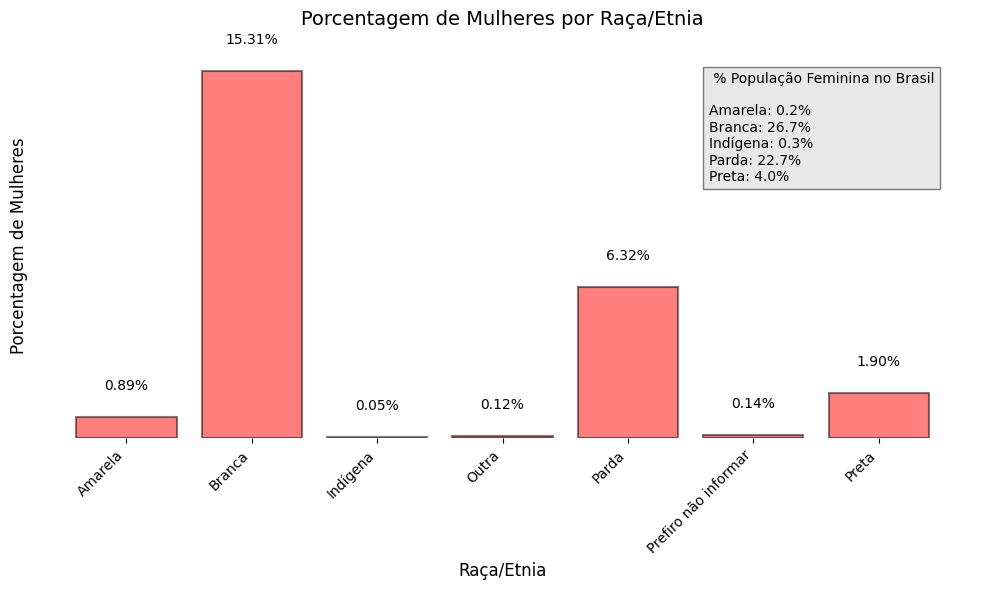

In [ ]:
# Contagem de dados por raça/etnia e gênero
dados = df.groupby(['Cor/raca/etnia','Genero']).size().unstack().fillna(0)

# Calcular a porcentagem de mulheres em relação ao total de homens e mulheres por raça/etnia
info_box_data = {
    'Amarela': 0.2,
    'Branca': 26.7,
    'Indígena': 0.3,
    'Parda': 22.7,
    'Preta': 4.0
}

porcentagem_mulheres = (dados['Feminino'] / len(df)) * 100

# Definir os índices para o eixo x
indices = range(len(dados.index))

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(indices, porcentagem_mulheres, color='red', alpha=0.5, edgecolor='black', linewidth=1.5)  # Adicionando bordas pretas

# Adicionar rótulos às barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)

# Adicionar sombra nas barras
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Adicionar rótulos e títulos
plt.xlabel('Raça/Etnia', fontsize=12)
plt.ylabel('Porcentagem de Mulheres', fontsize=12)
plt.title('Porcentagem de Mulheres por Raça/Etnia', fontsize=14, pad=20)

# Adicionar quadro informativo
info_text = ' % População Feminina no Brasil\n\n' + '\n'.join([f'{raca}: {percentual}%' for raca, percentual in info_box_data.items()])
plt.text(0.72, 0.95, info_text, transform=plt.gca().transAxes, bbox=dict(facecolor='lightgray', alpha=0.5), fontsize=10, verticalalignment='top')


# Definir os rótulos do eixo x
plt.xticks(indices, dados.index, rotation=45, ha='right')

# Remover eixo y quando as barras ficam muito pequenas
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

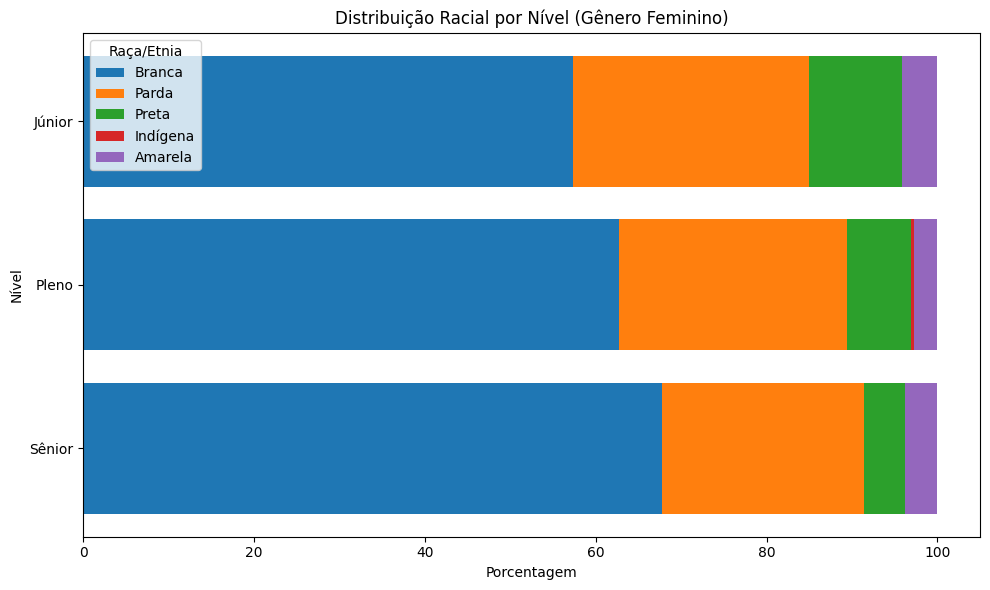

In [ ]:


# Filtrar os dados para excluir 'Prefiro não informar' e 'Outra' na raça/etnia
nivel_racial_lim = df[(df['Cor/raca/etnia'] != 'Prefiro não informar') & (df['Cor/raca/etnia'] != 'Outra')]

# Filtrar os dados para incluir apenas gênero 'Feminino'
nivel_racial_fem = nivel_racial_lim[nivel_racial_lim['Genero'] == 'Feminino']

# Contar o número de cargos para cada combinação de nível e raça/etnia
cargos = nivel_racial_fem.groupby(['Nivel', 'Cor/raca/etnia']).size().unstack(fill_value=0)

# Calcular a porcentagem de cada raça/etnia em relação ao total de cargos para essa raça/etnia
perc = cargos.div(cargos.sum(axis=1), axis=0) * 100

# Ordenar as colunas para uma melhor visualização
perc = perc[['Branca', 'Parda', 'Preta', 'Indígena', 'Amarela']]

# Criar o gráfico Likert
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar as barras Likert
bottom = 0
for race in perc.columns:
    ax.barh(perc.index, perc[race], left=bottom, label=race)
    bottom += perc[race]

# Personalizar o gráfico
ax.set_title('Distribuição Racial por Nível (Gênero Feminino)')
ax.set_xlabel('Porcentagem')
ax.set_ylabel('Nível')
ax.legend(title='Raça/Etnia')
ax.invert_yaxis()

# Mostrar o gráfico
plt.tight_layout()
plt.show()

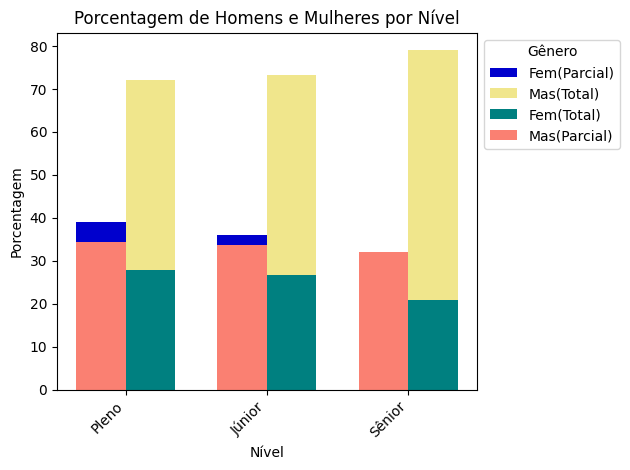

In [ ]:
# Dados fornecidos
nivel = ['Feminino', 'Masculino']
df_copy1 = df[df['Genero'] != 'Prefiro não informar'].copy()
nivel_genero = df_copy1.groupby('Genero')['Nivel'].value_counts()
quant_genero = nivel_genero.groupby('Nivel').sum()
quant_nivel = nivel_genero.groupby('Genero').sum()
perc_gnivel_genero = (nivel_genero / quant_genero).dropna() * 100
perc_genero_nivel = (nivel_genero / quant_nivel) * 100

# Definir a largura das barras
bar_width = 0.35

# Definir a posição das barras no eixo x
bar_positions = np.arange(len(perc_genero_nivel['Feminino'].index))

# Plotar as barras para o gênero Feminino
plt.bar(bar_positions - bar_width/2, perc_genero_nivel['Feminino'], bar_width, label='Fem(Parcial)', color='mediumblue')
plt.bar(bar_positions + bar_width/2, perc_gnivel_genero['Masculino'], bar_width, label='Mas(Total)', color='khaki')

# Plotar as barras para o gênero Masculino
plt.bar(bar_positions + bar_width/2, perc_gnivel_genero['Feminino'], bar_width, label='Fem(Total)', color='teal')
plt.bar(bar_positions - bar_width/2, perc_genero_nivel['Masculino'], bar_width, label='Mas(Parcial)', color='salmon')


# Personalizar o gráfico
plt.title('Porcentagem de Homens e Mulheres por Nível')
plt.xlabel('Nível')
plt.ylabel('Porcentagem')
plt.xticks(bar_positions, perc_genero_nivel['Feminino'].index, rotation=45, ha='right')
plt.legend(title='Gênero', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(False)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

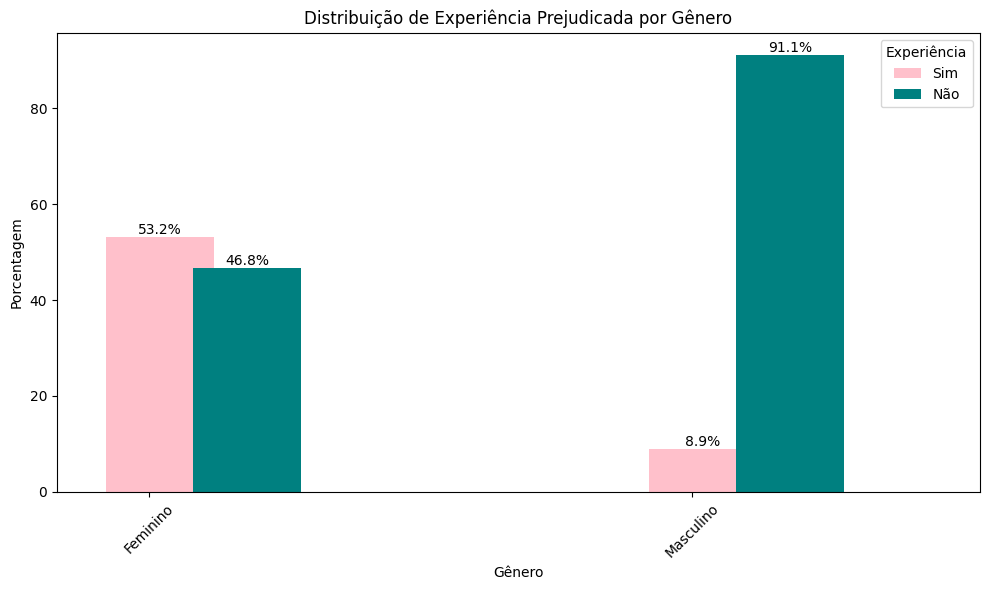

In [ ]:
# Filtrar os dados para excluir a categoria 'Prefiro não informar'
df_filtrado = df[df['Genero'] != 'Prefiro não informar'].copy()

# Criar uma nova coluna indicando se a experiência profissional foi prejudicada ou não
df_filtrado['Experiencia_Prejudicada'] = df_filtrado['experiencia_profissional_prejudicada'].apply(lambda x: 'Sim' if 'Sim' in str(x) else 'Não')

# Agrupar os dados por gênero e a nova coluna que indica se a experiência profissional foi prejudicada ou não
grupo_genero_experiencia = df_filtrado.groupby('Genero')['Experiencia_Prejudicada'].value_counts()

total_por_genero = grupo_genero_experiencia.groupby('Genero').sum()

percentuais = pd.DataFrame((grupo_genero_experiencia/total_por_genero)*100)

# Plotar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar barras com cores diferentes para 'Sim' e 'Não'
for status in ['Sim', 'Não']:
    data = percentuais.loc[(slice(None), status), :].droplevel(1)
    if status == 'Sim':
        data.plot(kind='bar', color='pink', label='Sim', position=0.4, width=0.2, ax=ax)
    else:
        data.plot(kind='bar', color='teal', label='Não', position=-0.4, width=0.2, ax=ax)

# Adicionar rótulos de porcentagem nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (p.get_x() + width / 2, p.get_height()), ha='center', va='bottom', fontsize=10)

# Configurações adicionais do gráfico
plt.title('Distribuição de Experiência Prejudicada por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x
plt.legend(['Sim', 'Não'], title='Experiência', loc='upper right')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [ ]:
!pip install squarify -qqq
import squarify

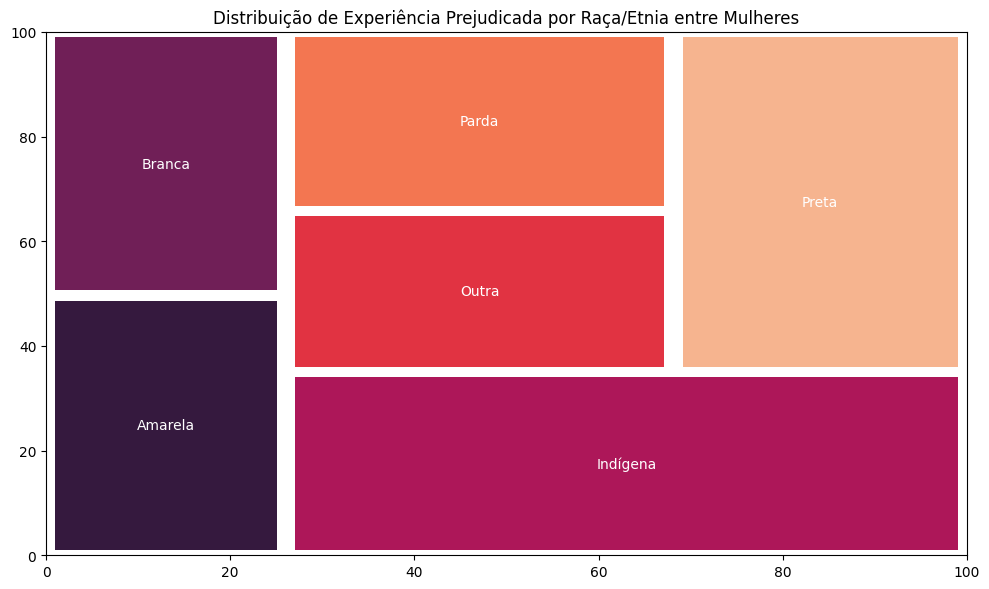

In [ ]:
# Filtrar os dados para incluir apenas mulheres e excluir a categoria 'Prefiro não informar'
df_mulheres = df[(df['Genero'] == 'Feminino') & (df['Cor/raca/etnia'] != 'Prefiro não informar')].copy()

# Criar uma nova coluna indicando se a experiência profissional foi prejudicada ou não
df_mulheres['Experiencia_Prejudicada'] = df_mulheres['experiencia_profissional_prejudicada'].apply(lambda x: 'Sim' if 'Sim' in str(x) else 'Não')

# Contagem de dados por raça/etnia e se a experiência profissional foi prejudicada ou não
dados = df_mulheres.groupby(['Cor/raca/etnia', 'Experiencia_Prejudicada']).size().unstack()

# Calcular o total de mulheres por raça/etnia
total_por_etnia = dados.sum(axis=1)

# Calcular as proporções de cada categoria em relação ao total por raça/etnia
dados_percentual = dados['Sim'].div(total_por_etnia, axis=0) * 100

plt.figure(figsize=(10,6))
squarify.plot(sizes=dados_percentual, label=dados_percentual.index,
              pad = 0.2,
              text_kwargs = {'fontsize': 10, 'color': 'white'},
              color = sns.color_palette("rocket", len(dados_percentual)))



# Configurações adicionais do gráfico
plt.title('Distribuição de Experiência Prejudicada por Raça/Etnia entre Mulheres')


# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Filtrar os dados para incluir apenas mulheres e excluir a categoria 'Branca'
mulheres = df[(df['Genero'] == 'Feminino') & (df['Cor/raca/etnia'] != 'Branca')]

aspectos = mulheres['aspectos_prejudicados'].value_counts().sort_values(ascending=False).head(10)
aspectos.index

Index(['Aprovação em processos seletivos/entrevistas',
       'Quantidade de oportunidades de emprego/vagas recebidas',
       'Atenção dada pelas pessoas diante das minhas opiniões e ideias',
       'Velocidade de progressão de carreira',
       'Senioridade das vagas recebidas em relação à sua experiência',
       'Oportunidades de progressão de carreira, Velocidade de progressão de carreira, Atenção dada pelas pessoas diante das minhas opiniões e ideias',
       'Oportunidades de progressão de carreira',
       'Quantidade de oportunidades de emprego/vagas recebidas, Senioridade das vagas recebidas em relação à sua experiência, Aprovação em processos seletivos/entrevistas, Oportunidades de progressão de carreira, Velocidade de progressão de carreira, Atenção dada pelas pessoas diante das minhas opiniões e ideias',
       'Nível de cobrança no trabalho / Stress no trabalho, Atenção dada pelas pessoas diante das minhas opiniões e ideias',
       'Senioridade das vagas recebidas em rel

In [ ]:
faixa_salarial_mulheres = {
    '< 1000': 4,
    '1001 a 2000': 16,
    '2001 a 3000': 32,
    '3001 a 4000': 31,
    '4001 a 6000': 42,
    '6001 a 8.000': 50,
    '8001 a 12000': 71,
    '12001 a 16000': 26,
    '16001 a 20000': 19,
    '20001 a 25000': 5,
    '25001 a 30000': 4,
    '30001 a 40000': 2,
    '> 40001': 0
}

In [ ]:
faixa_salarial_homens = {
    '< 1000': 9,
    '1001 a 2000': 53,
    '2001 a 3000': 60,
    '3001 a 4000': 67,
    '4001 a 6000': 133,
    '6001 a 8.000': 121,
    '8001 a 12000': 182,
    '12001 a 16000': 119,
    '16001 a 20000': 52,
    '20001 a 25000': 40,
    '25001 a 30000': 23,
    '30001 a 40000': 15,
    '> 40001': 14
}

In [ ]:
faixa_salario = ['< 1000', '1001 a 2000', '2001 a 3000', '3001 a 4000', '4001 a 6000', '6001 a 8.000', '8001 a 12000', '12001 a 16000', '16001 a 20000', '20001 a 25000', '25001 a 30000', '30001 a 40000', '> 40001']

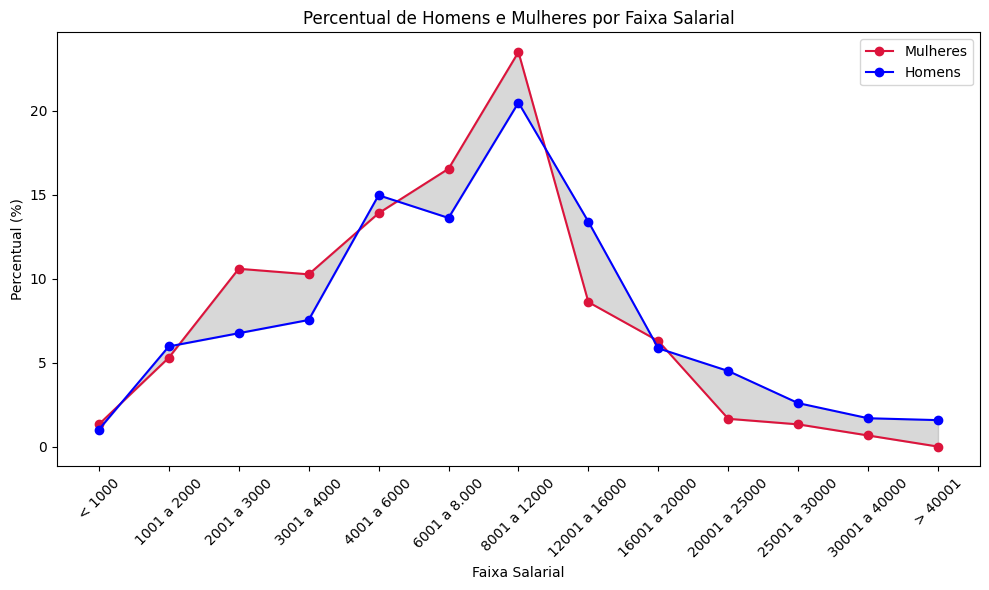

In [ ]:
faixas_salariais = faixa_salario
faixas_numericas = np.arange(len(faixas_salariais))
quantidade_mulheres = faixa_salarial_mulheres
quantidade_homens = faixa_salarial_homens

# Calcular os percentuais para cada faixa salarial
total_mulheres = sum(faixa_salarial_mulheres.values())
total_homens = sum(faixa_salarial_homens.values())

percentuais_mulheres = [valor / total_mulheres * 100 for valor in faixa_salarial_mulheres.values()]
percentuais_homens = [valor / total_homens * 100 for valor in faixa_salarial_homens.values()]

faixas_salariais = list(faixa_salarial_mulheres.keys())
faixas_numericas = np.arange(len(faixas_salariais))

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(faixas_numericas, percentuais_mulheres, marker='o', color='crimson', label='Mulheres')
plt.plot(faixas_numericas, percentuais_homens, marker='o', color='blue', label='Homens')

# Definir os rótulos do eixo x
plt.xticks(faixas_numericas, faixas_salariais, rotation=45)
plt.fill_between(faixas_salariais, percentuais_mulheres, percentuais_homens, color='gray', alpha=0.3)

# Adicionar rótulos e título
plt.xlabel('Faixa Salarial')
plt.ylabel('Percentual (%)')
plt.title('Percentual de Homens e Mulheres por Faixa Salarial')
plt.legend()

# Mostrar o gráfico
plt.grid(False)
plt.tight_layout()
plt.show()

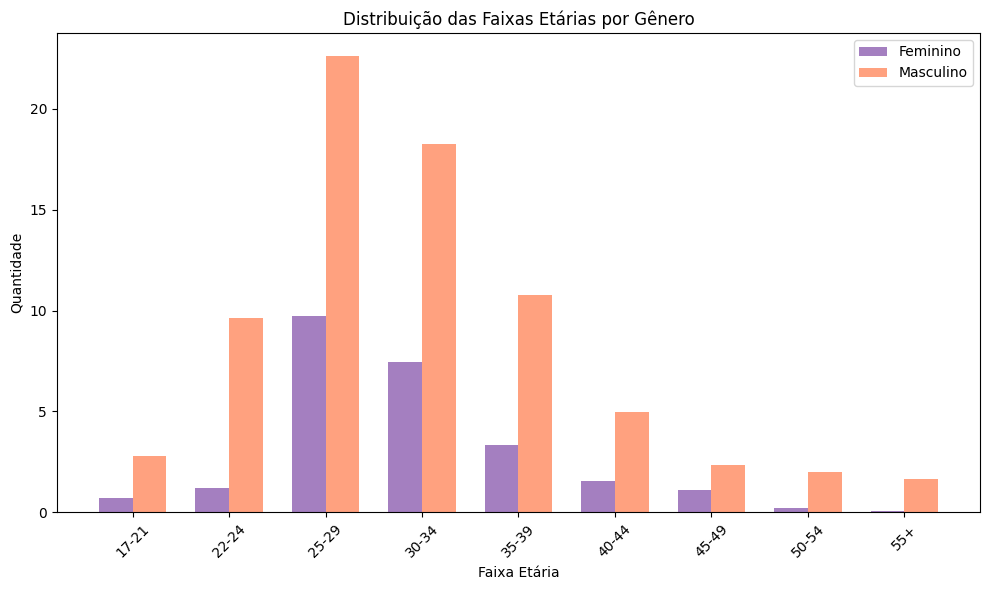

In [ ]:
faixa_etaria_mulher_count = df[df['Genero'] == 'Feminino']['Faixa idade'].value_counts().sort_index()
faixa_etaria_homem_count = df[df['Genero'] == 'Masculino']['Faixa idade'].value_counts().sort_index()

idade = df['Faixa idade'].value_counts().sort_index()

faixa_etaria_mulher = (faixa_etaria_mulher_count/idade * 100) * (faixa_etaria_mulher_count/faixa_etaria_mulher_count.sum())
faixa_etaria_homem = (faixa_etaria_homem_count/idade * 100) * (faixa_etaria_homem_count/faixa_etaria_homem_count.sum())

faixas_etarias = sorted(set(faixa_etaria_mulher.index) | set(faixa_etaria_homem.index))

# Criar uma lista de índices para as posições das barras
indices = np.arange(len(faixas_etarias))

# Definir a largura das barras
largura_barra = 0.35

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(indices - largura_barra/2, faixa_etaria_mulher, largura_barra, color='indigo', alpha=0.5, label='Feminino')
plt.bar(indices + largura_barra/2, faixa_etaria_homem, largura_barra, color='orangered', alpha=0.5, label='Masculino')

# Configurar o eixo x
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade')
plt.title('Distribuição das Faixas Etárias por Gênero')
plt.xticks(indices, faixas_etarias, rotation=45)

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [ ]:
print(faixa_etaria_homem)
print(faixa_etaria_mulher)

17-21     2.771644
22-24     9.649496
25-29    22.619867
30-34    18.253432
35-39    10.743859
40-44     4.984526
45-49     2.335413
50-54     1.978780
55+       1.657520
Name: Faixa idade, dtype: float64
17-21    0.720195
22-24    1.186348
25-29    9.729877
30-34    7.475093
35-39    3.329438
40-44    1.534638
45-49    1.097832
50-54    0.208546
55+      0.068238
Name: Faixa idade, dtype: float64


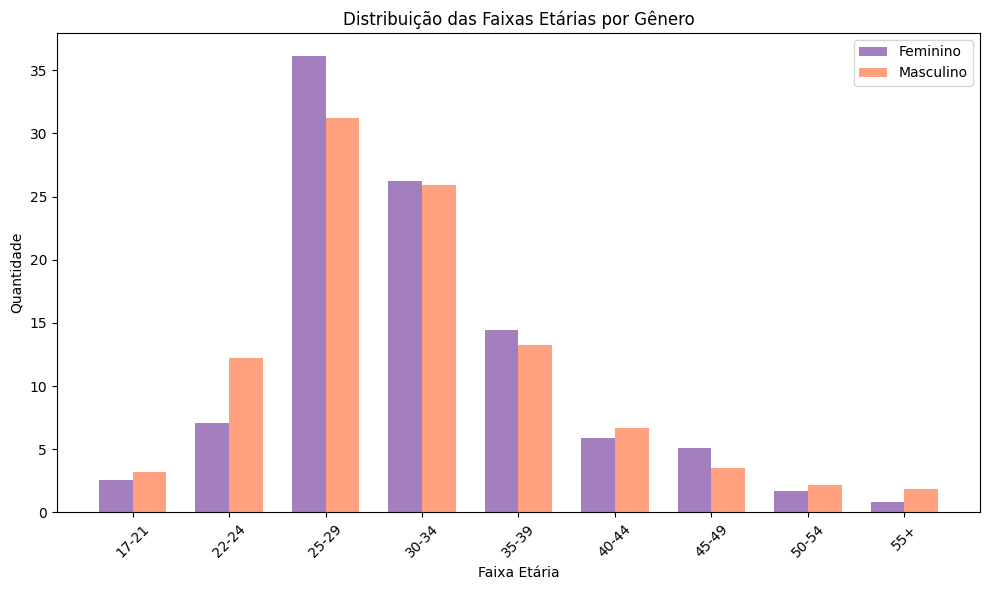

In [ ]:
# Filtrar os dados para cada gênero e contar o número de ocorrências de cada faixa etária
faixa_etaria_mulher_count = df[df['Genero'] == 'Feminino']['Faixa idade'].value_counts().sort_index()
faixa_etaria_homem_count = df[df['Genero'] == 'Masculino']['Faixa idade'].value_counts().sort_index()

faixa_etaria_mulher = faixa_etaria_mulher_count/faixa_etaria_mulher_count.sum() * 100
faixa_etaria_homem = faixa_etaria_homem_count/faixa_etaria_homem_count.sum() * 100

# Obter todas as faixas etárias (apenas para garantir que ambas as séries tenham o mesmo índice)
faixas_etarias = sorted(set(faixa_etaria_mulher.index) | set(faixa_etaria_homem.index))

# Criar uma lista de índices para as posições das barras
indices = np.arange(len(faixas_etarias))

# Definir a largura das barras
largura_barra = 0.35

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(indices - largura_barra/2, faixa_etaria_mulher, largura_barra, color='indigo', alpha=0.5, label='Feminino')
plt.bar(indices + largura_barra/2, faixa_etaria_homem, largura_barra, color='orangered', alpha=0.5, label='Masculino')

# Configurar o eixo x
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade')
plt.title('Distribuição das Faixas Etárias por Gênero')
plt.xticks(indices, faixas_etarias, rotation=45)

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [ ]:
percentuais.columns

Index(['Feminino', 'Masculino'], dtype='object', name='Genero')

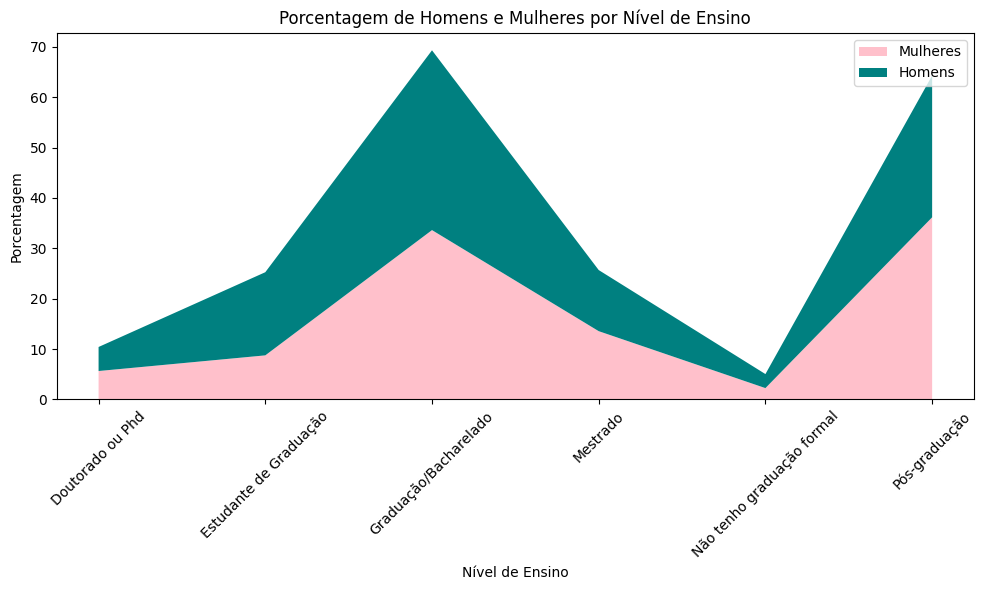

In [ ]:
# Calcular a porcentagem de homens e mulheres em cada nível de ensino
df_educacao = df.groupby('Genero')['Nivel de Ensino'].value_counts()
df_genero = df_educacao.groupby('Genero').sum()
percentuais = (df_educacao / df_genero) * 100

# Reorganizar os dados para criar um DataFrame com homens e mulheres como colunas
percentuais = percentuais.unstack(level=0)

# Plotar o gráfico de área
plt.figure(figsize=(10, 6))
plt.stackplot(percentuais.index, percentuais['Feminino'], percentuais['Masculino'], labels=['Mulheres', 'Homens'], colors=['pink', 'teal'])
plt.xlabel('Nível de Ensino')
plt.ylabel('Porcentagem')
plt.title('Porcentagem de Homens e Mulheres por Nível de Ensino')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
a = df.groupby('Genero')['Nivel de Ensino'].value_counts()
print(a)
b = a.groupby('Genero').sum()
print(b)
percentuais = (a / b) * 100
print(percentuais)

Genero                Nivel de Ensino           
Feminino              Pós-graduação                 128
                      Graduação/Bacharelado         119
                      Mestrado                       48
                      Estudante de Graduação         31
                      Doutorado ou Phd               20
                      Não tenho graduação formal      8
Masculino             Graduação/Bacharelado         359
                      Pós-graduação                 283
                      Estudante de Graduação        166
                      Mestrado                      122
                      Doutorado ou Phd               48
                      Não tenho graduação formal     28
Prefiro não informar  Graduação/Bacharelado           1
Name: Nivel de Ensino, dtype: int64
Genero
Feminino                 354
Masculino               1006
Prefiro não informar       1
Name: Nivel de Ensino, dtype: int64
Genero                Nivel de Ensino           
Feminino

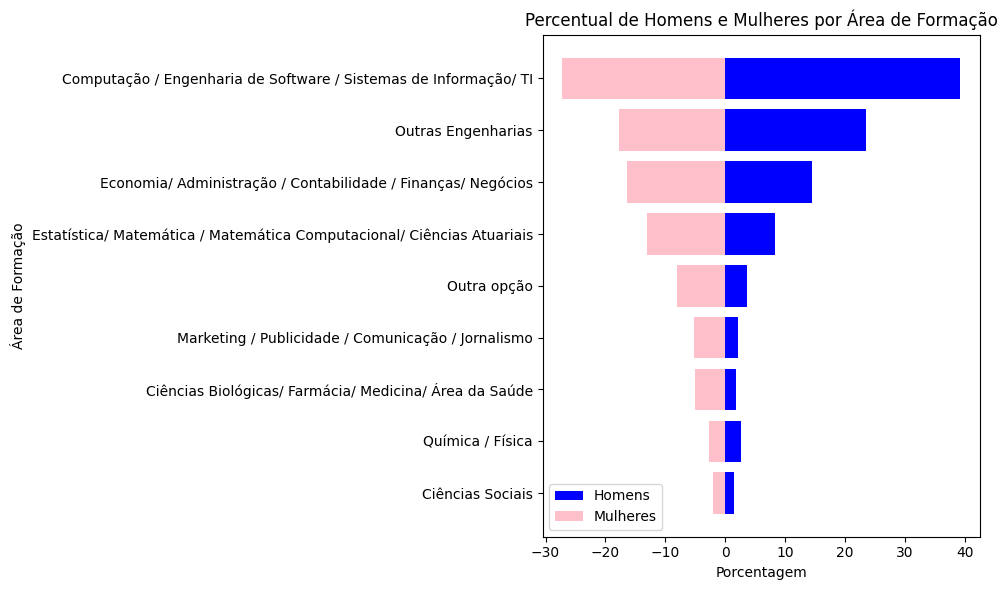

In [ ]:
# Calcular a porcentagem de homens e mulheres em cada área de formação
df_formacao_genero = df.groupby('Área de Formação')['Genero'].value_counts().unstack()
total_por_genero = df['Genero'].value_counts()

# Calcular porcentagem
percentuais_formacao_genero = (df_formacao_genero.div(total_por_genero, axis=1) * 100).sort_values(by='Feminino', ascending=True)

# Plotar o gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(10, 6))

# Criar uma barra para cada sexo
y = np.arange(len(percentuais_formacao_genero.index))
width_homens = percentuais_formacao_genero['Masculino'].values
width_mulheres = percentuais_formacao_genero['Feminino'].values

ax.barh(y, width_homens, color='blue', label='Homens', align='center')
ax.barh(y, -width_mulheres, color='pink', label='Mulheres', align='center')

# Adicionar rótulos e título
plt.xlabel('Porcentagem')
plt.ylabel('Área de Formação')
plt.title('Percentual de Homens e Mulheres por Área de Formação')

# Configurações adicionais do eixo y
plt.yticks(y, percentuais_formacao_genero.index)

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()



In [ ]:
df['Área de Formação'].values

array(['Computação / Engenharia de Software / Sistemas de Informação/ TI',
       'Outras Engenharias',
       'Computação / Engenharia de Software / Sistemas de Informação/ TI',
       ...,
       'Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais',
       'Marketing / Publicidade / Comunicação / Jornalismo',
       'Computação / Engenharia de Software / Sistemas de Informação/ TI'],
      dtype=object)

In [ ]:
df_copy1 = df[df['Genero'] != 'Prefiro não informar'].copy()
df_copy1['Genero'].value_counts()

Masculino    3194
Feminino     1056
Name: Genero, dtype: int64

In [ ]:
nivel_genero = df_copy1.groupby('Nivel')['Genero'].value_counts()
nivel_genero

Nivel   Genero   
Júnior  Masculino    743
        Feminino     272
Pleno   Masculino    760
        Feminino     295
Sênior  Masculino    709
        Feminino     187
Name: Genero, dtype: int64

In [ ]:
quant_genero = nivel_genero.groupby('Genero').sum()
quant_genero

Genero
Feminino      754
Masculino    2212
Name: Genero, dtype: int64

In [ ]:
quant_nivel = nivel_genero.groupby('Nivel').sum()
quant_nivel

Nivel
Júnior    1015
Pleno     1055
Sênior     896
Name: Genero, dtype: int64

In [ ]:
# percentuagem do genero pelo total do genero
perc_gnivel_genero = (nivel_genero/quant_genero).dropna() * 100
perc_gnivel_genero

Nivel   Genero   
Júnior  Masculino    33.589512
        Feminino     36.074271
Pleno   Masculino    34.358047
        Feminino     39.124668
Sênior  Masculino    32.052441
        Feminino     24.801061
Name: Genero, dtype: float64

In [ ]:
# percentuagem do genero pelo total que ocupa o quarto
perc_genero_nivel = (nivel_genero/quant_nivel) * 100
perc_genero_nivel

Nivel   Genero   
Júnior  Masculino    73.201970
        Feminino     26.798030
Pleno   Masculino    72.037915
        Feminino     27.962085
Sênior  Masculino    79.129464
        Feminino     20.870536
Name: Genero, dtype: float64

In [ ]:
nivel = ['Júnior', 'Pleno', 'Sênior']


<bound method Series.items of Nivel   Genero   
Júnior  Masculino    33.589512
        Feminino     36.074271
Pleno   Masculino    34.358047
        Feminino     39.124668
Sênior  Masculino    32.052441
        Feminino     24.801061
Name: Genero, dtype: float64>

In [ ]:
nivel_racial_lim = df[(df['Cor/raca/etnia'] != 'Prefiro não informar') & (df['Cor/raca/etnia'] != 'Outra')]
nivel_racial_fem = nivel_racial_lim[nivel_racial_lim['Genero']=='Feminino']
cargos = nivel_racial_fem.groupby('Nivel')['Cor/raca/etnia'].value_counts()
perc = cargos/cargos.groupby('Cor/raca/etnia').sum() *100
perc

Nivel   Cor/raca/etnia
Júnior  Branca             33.116883
        Parda              37.755102
        Preta              48.333333
        Amarela            42.307692
Pleno   Branca             39.610390
        Parda              39.795918
        Preta              36.666667
        Amarela            30.769231
        Indígena          100.000000
Sênior  Branca             27.272727
        Parda              22.448980
        Preta              15.000000
        Amarela            26.923077
Name: Cor/raca/etnia, dtype: float64